# Wings - T3 - Aug 2023 - Medium Challenge 1 - Wheat Dataset

In this case study, we will be working with a dataset of wheat kernels. The dataset contains measurements from three different varieties of wheat: Kama, Rosa, and Canadian.

The measurements include:
1. Area (A)
2. Perimeter (P)
3. Compactness (C = 4πA/P²)
4. Length of kernel
5. Width of kernel
6. Asymmetry coefficient
7. Length of kernel groove

These measurements are all continuous variables, and they can be used for tasks like classification or cluster analysis to distinguish between the different varieties of wheat.

Your task is to create a machine learning model that can accurately classify the variety of wheat given the measurements of a kernel. You will need to perform exploratory data analysis, preprocess the data, train different models, and evaluate their performance. You will also need to optimize the best performing model and present your results.

- Read the instructions and code for the questions given
- Run till the last cell to save your answers
- Do not delete any cell

Good luck!

Run the below cell to import required packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!mkdir .ans
from wings_classification_wheatdataset import test_wings_wheat

mkdir: cannot create directory ‘.ans’: File exists


Read wheat.csv and store it in variable data

In [98]:
#Enter code below
data = pd.read_csv('wheat.csv')
#End

# Task 1 - EDA

## Question 1 :

### Exploratory Data Analysis (EDA) 

The objective of this task is to perform EDA on a given dataset by following a series of steps. 


- Find the dimensions of the dataset and store it in variable `shape`. Type of shape - Tuple.
- Check whether the dataset contains any missing or null values.Store the count of NA values or missing values in each column and store the result in variable `na_values_count`.   Type of na_values_count - Pandas Series
- Describe data .Find the central tendencies, dispersion in data. Store the dataframe in variable `dist`. Type of dist - DataFrame. Hint - Use pandas function.
- Find the balance of classes within the dataset on the different varieties of wheat. Store the count of each class in variable `calls_freq`.Class names should be in increasing order. Hint : Apply pandas function. Type of class_freq - Series
- Example -
    - Class 1 : count
    - Class 2 : count
    - Class 3 : count

In [99]:
data

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [100]:
#Enter code below

shape = data.shape
na_values_count = data.isna().sum()
dist = data.describe()
class_freq = data.groupby('category')['category'].count()
class_freq

#End

category
1.0    70
2.0    70
3.0    70
Name: category, dtype: int64

**Run the below cell to save q1**

In [101]:
try:
    q1 = [shape,na_values_count,dist,class_freq]
    test_wings_wheat.save_answer_q1(q1)
except:
    print("Please check the expected variable")

Test case 1 Passed


## Question 2 :

### Vizualisation : The objective of this task is to create a scatter plot to visualize the relationship between length and width, with category variable as the color scheme.

- Use the "figure" and "axes" methods to create a scatter plot. The x-axis should represent the length, and the y-axis should represent the width.

- Assign different colors to the data points based on a category variable. Each category will be represented by a distinct color in the scatter plot.

- Add title "Scatter plot Length/Width/Category", x-label "Length", and y-label "Width".

- Store the figure object in variable `q2`



**Sample plot**

<img src="sample_plot_1.jpg" width="200px" height="200px">


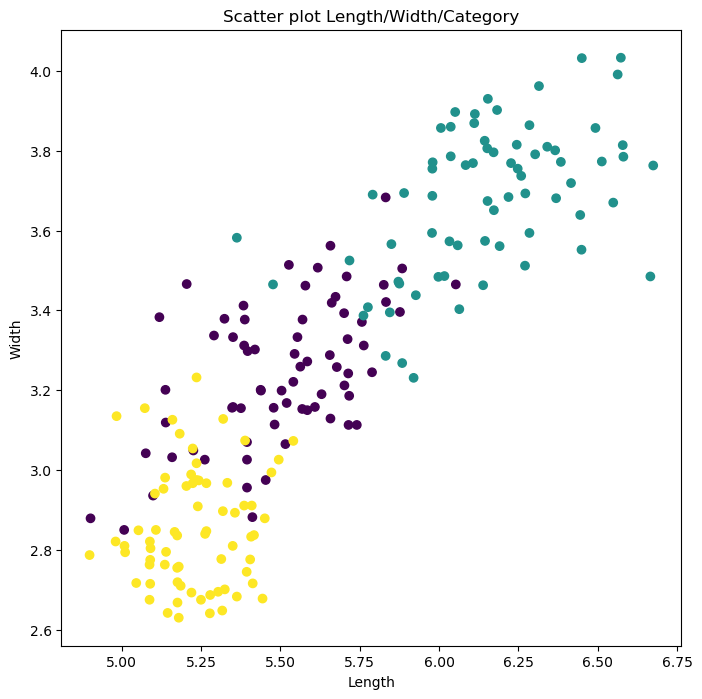

In [102]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
#Enter code below

ax.scatter(data['length'],data['width'],c=data['category'])
ax.set_title('Scatter plot Length/Width/Category')
ax.set_xlabel('Length')
ax.set_ylabel('Width')


#End
q2 = fig

**Run the below cell to save q2**

In [103]:
try:
    test_wings_wheat.save_answer_q2(q2)
except:
    print("Please check plot 1")

Test case 2 Passed


# Task 2 - Feature Engineering

## Question 3 : Feature Engineering - Discretization Technique
 
### The objective of this task is to apply discretization technique on dataset to create a new column "scale" based on the values in the "area" column. 


- Add a new column called "scale" to the dataset
- Discretization thresholds :
    - small scale - <12
    - medium scale- 12 to 17
    - large scale - >17

In [104]:
#Enter code below
bins = [0,12,17,np.float64('inf')]
labels = ['small scale','medium scale','large scale']

data['scale'] = pd.cut(data['area'],bins=bins, labels = labels)
data['scale']



#End


0      medium scale
1      medium scale
2      medium scale
3      medium scale
4      medium scale
           ...     
205    medium scale
206     small scale
207    medium scale
208     small scale
209    medium scale
Name: scale, Length: 210, dtype: category
Categories (3, object): ['small scale' < 'medium scale' < 'large scale']

**Run the below cell to save q3**

In [105]:
try:
    q3 = data.copy()
    test_wings_wheat.save_answer_q3(q3)
except:
    print("Please check column scale")

Test case 3 Passed


# Task - 3 Data Preprocessing

## Question 4 :

### Preprocessing - The objective of this task is to perform data-preprocessing on data

- Remove NA Values

- Use the box plot visualization technique to check for outliers in the dataset. Remove the outliers from data
- Encode categorical columns in the dataset to numerical values. Hint : Use label encoder.
- Standardize the numerical variables in the dataset to ensure they are on a similar scale. 
- Perform the operations on data and store the resulting dataframe in variable q3
- Store the independent variables in variable X and the dependent variable in variable y.
- Note : Do not perform scaling on column Category

In [106]:
Q1 = data['compactness'].quantile(0.25)
Q3 = data['compactness'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
higher_bound = Q3 + 1.5 * IQR

data = data[(data['compactness'] >= lower_bound) & (data['compactness'] <= higher_bound )]


In [107]:
Q1 = data['asymmetry coefficient'].quantile(0.25)
Q3 = data['asymmetry coefficient'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
higher_bound = Q3 + 1.5 * IQR

data = data[(data['asymmetry coefficient'] >= lower_bound) & (data['asymmetry coefficient'] <= higher_bound )]

In [108]:
data

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category,scale
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0,medium scale
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,medium scale
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,medium scale
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,medium scale
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,medium scale
...,...,...,...,...,...,...,...,...,...
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3.0,medium scale
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0,medium scale
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0,small scale
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0,small scale


In [109]:
np.random.seed(10)
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['scale']= le.fit_transform(data['scale'])

In [110]:
y = data['category']
ss = StandardScaler()
X = ss.fit_transform(data.drop('category', axis=1))
data = pd.DataFrame(ss.fit_transform(data.drop('category', axis=1)), columns= ss.get_feature_names_out())
data['category'] = y

In [111]:
data

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,scale,category
0,0.119170,0.194283,-0.033032,0.285057,0.117674,-0.985770,-0.392994,0.138927,1.0
1,-0.011710,-0.012397,0.414569,-0.185444,0.173712,-1.822389,-0.927065,0.138927,1.0
2,-0.214919,-0.379828,1.473743,-0.777510,0.184386,-0.653348,-1.192077,0.138927,1.0
3,-0.369909,-0.494651,1.052732,-0.703220,0.296462,-0.959343,-1.232537,0.138927,1.0
4,0.422261,0.309105,1.402836,0.048681,0.784796,-1.588024,-0.484029,0.138927,1.0
...,...,...,...,...,...,...,...,...,...
200,-0.876209,-0.854427,-0.666764,-0.973364,-0.821634,0.195093,-0.836030,0.138927,3.0
201,-0.938205,-1.061107,0.290481,-1.124194,-0.765595,-0.005194,-1.101042,0.138927,3.0
202,-1.268850,-1.306061,-0.914939,-1.117441,-1.261934,0.477443,-0.831984,1.637875,3.0
203,-1.058753,-1.053452,-0.870622,-1.038649,-1.152526,-0.028144,-0.749041,1.637875,NaN


**Run the below cell to save q4**

In [112]:
try:
    q4 = [data,X,y]
    test_wings_wheat.save_answer_q4(q4)
except:
    print("Please check variable q4")

Test case 4 Passed



### The objective of this task is to perform a train-test split on a data

- Split the preprocessed dataset into two subsets: a training set and a testing set. 

- Allocate 70% percentage to the training set and the remaining 30% to the testing set.

- Run the below cell to perform train test split


In [113]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task -4 Model Building

## Question 5

### Model Training - Logistic regression

The objective of this task is to build a logistic regression model for predicting a target variable based on a set of independent variables.

- Fit the logistic regression model to the training data (X_train and y_train) .
- Use the trained model to predict the target variable for the test dataset (X_test). Store the predicted values in a variable called y_pred_log.
- Print the confusionm matrix .
- Print the classification report.
- Store the model in variable model_1
- Store the confusion matrix in variable log_cm
- Store the classification report in variable log_cl
- Type of log_cl - Dict
- Set random_state to 25 to ensure reproducability

In [114]:
#Enter code below

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

model_1 = LogisticRegression(random_state=25)
model_1.fit(X_train,y_train)

y_pred_log = model_1.predict(X_test)

log_cm = confusion_matrix(y_test,y_pred_log)
log_cl = classification_report(y_test,y_pred_log,output_dict=True)

#End

**Run the below cell to save q5**

In [115]:
try:
    q5 = [model_1,y_pred_log,log_cm,log_cl]
    test_wings_wheat.save_answer_q5(q5)
except:
    print("Please check variable q5")

Test case 5 Passed


## Question 6

### Model Training - Random Forest Classifier

The objective of this task is to build a Random Forest Classifier for predicting a target variable based on a set of independent variables. 

- Fit the Random Forest Classifier to the training data (X_train and y_train)
- Use the trained model to predict the target variable for the test dataset (X_test). Store the predicted values in a variable called y_pred_forest.
- Calculate the confusion matrix,classification report
- Store the model in variable model_2
- Store the confusion matrix in variable rfc_cm
- Store the classification report in variable rfc_cl
- Type of rfc_cl - Dict
- Set random_state to 42 to ensure reproducability

In [116]:
#Enter code below
from sklearn.ensemble import RandomForestClassifier


model_2 =  RandomForestClassifier(random_state=42)
model_2.fit(X_train,y_train)
y_pred_rfc = model_2.predict(X_test)
rfc_cm = confusion_matrix(y_test,y_pred_rfc)
rfc_cl = classification_report(y_test,y_pred_rfc,output_dict=True)


#End

**Run the below cell to save q6**

In [117]:
try:
    q6 = [model_2,y_pred_rfc,rfc_cm,rfc_cl]
    test_wings_wheat.save_answer_q6(q6)
except:
    print("Please check variable q6")

Test Case 6 Passed


## Question 7

### Model Training - GradientBoostingClassifier

The objective of this  task is to build a Gradient Boosting Classifier for predicting a target variable based on a set of independent variables

- Fit the Gradient Boosting Classifier to the training data (X_train and y_train)
- Use the trained model to predict the target variable for the test dataset (X_test). Store the predicted values in a variable called y_pred_gbc.
- Evaluate the model using confusion matrix and generate the classification report
- Store the model in variable model_3
- Store the confusion matrix in variable gbc_cm
- Store the classification report in variable gbc_cl
- Type of gbc_cl - Dict
- Set random_state to 42 to ensure reproducability

In [118]:
#Enter code below
from sklearn.ensemble import GradientBoostingClassifier

model_3 = GradientBoostingClassifier(random_state=42)
model_3.fit(X_train,y_train)
y_pred_gbc = model_3.predict(X_test)

gbc_cm = confusion_matrix(y_test,y_pred_gbc)

gbc_cl = classification_report(y_test,y_pred_gbc,output_dict=True)

#End

**Run the below cell to save q7**

In [119]:
try:
    q7 = [model_3,y_pred_gbc,gbc_cm,gbc_cl]
    test_wings_wheat.save_answer_q7(q7)
except:
    print("Please check variable q7")

Test Case 7 Passed


In [120]:
gbc_cl


{'1.0': {'precision': 0.95,
  'recall': 0.95,
  'f1-score': 0.9500000000000001,
  'support': 20},
 '2.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21},
 '3.0': {'precision': 0.9523809523809523,
  'recall': 0.9523809523809523,
  'f1-score': 0.9523809523809523,
  'support': 21},
 'accuracy': 0.967741935483871,
 'macro avg': {'precision': 0.9674603174603175,
  'recall': 0.9674603174603175,
  'f1-score': 0.9674603174603176,
  'support': 62},
 'weighted avg': {'precision': 0.967741935483871,
  'recall': 0.967741935483871,
  'f1-score': 0.967741935483871,
  'support': 62}}

## Question 8

**Select the best model from the options given below**

- Run the below cell to display the options

In [121]:
import ipywidgets as widgets
best_model = widgets.RadioButtons(
    options=['Logistic regression','Random Forest Classifier','GradientBoostingClassifier'],
    description='Select the best model from the options',
    value=None,
    disabled=False
)
display(best_model)

RadioButtons(description='Select the best model from the options', options=('Logistic regression', 'Random For…

**Run the below cell to save q8**

In [122]:
try:
    q8 = best_model
    test_wings_wheat.save_answer_q8(q8)
except:
    print("Please select the option")

q8 Saved Successfully


# Task - 5 Model Optimization

## Question 9 - Model Optimization

### The objective of this task is to optimize the performance of a Gradient Boosting Classifier by tuning its hyperparameters using grid search.


- This grid contain different values for the learning rate, number of estimators, and maximum depth. 
- Hyperparameter Grid: 'learning_rate': [0.01, 0.1, 0.12],
                       'n_estimators': [100, 200, 300],
                       'max_depth': [3, 5, 7]
                     
- Store the grid search object in variable grid_search
- Fit the Gradient Boosting Classifier to the training dataset and evaluate each combination of hyperparameters using 5 fold cross-validation.
- Identify the best combination of hyperparameters that yields the highest performance based on the chosen evaluation metric - accuracy.
- Store the best combination in variable grid_search_best

In [123]:
#Enter code below
from sklearn.model_selection import  GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.12],
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=model_3,param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train,y_train)

grid_search_best = grid_search.best_params_
#End

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

**Run the below cell to save q9**

In [124]:
try:
    q9 = [grid_search,grid_search_best]
    test_wings_wheat.save_answer_q9(q9)
except:
    print("Please check variable q9")

Test Case 9 Passed


## Question 10 - Retrain model

### The objective of this task is to build a new Gradient Boosting Classifier with the best hyperparameters identified through grid search. 


- Create a new instance of the Gradient Boosting Classifier using the best hyperparameters identified from the grid search and store it in variable model_4.
- Fit the new Gradient Boosting Classifier on the training dataset
- Use the trained model to predict the target variable for the test dataset (X_test). Store the predicted values in a variable called y_pred_gbc_grid.
- Set random_state to 42

In [125]:
grid_search_best

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [126]:
#Enter code below

model_4 = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,random_state=42)
model_4.fit(X_train,y_train)

y_pred_gbc_grid = model_4.predict(X_test)


#End

**Run the below cell to save q10**

In [127]:
try:
    q10 = [model_4,y_pred_gbc_grid]
    test_wings_wheat.save_answer_q10(q10)
except:
    print("Please check variable q10")

Test Case 10 Passed


# Task - 5 Model Evaluation

## Question 11 - Model Evaluation

### Evaluate the model (model_4) using confusion matrix and generate the classification report


- Store the confusion matrix in variable gbc_cm_best
- Store the classification repot in variable gbc_cl_best
- Type of gbc_cl_best - Dict

In [130]:
#Enter code below

gbc_cm_best = confusion_matrix(y_test,y_pred_gbc_grid)

gbc_cl_best = classification_report(y_test,y_pred_gbc_grid,output_dict=True)



#End

**Run the below cell to save q11**

In [131]:
try:
    q11 = [gbc_cm_best,gbc_cl_best]
    test_wings_wheat.save_answer_q11(q11)
except:
    print("Please check variable q11")

Test Case 11 Passed


**Run the below cell to save your answers. Do not delete the cell.**

In [132]:
try:
    test_wings_wheat.save_ans(q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11)
except:
    print("Please check the variables q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11")

Test case 1 Passed
Test case 2 Passed
Test case 3 Passed
Test case 4 Passed
Test case 5 Passed
Test Case 6 Passed
Test Case 7 Passed
q8 Saved Successfully
Test Case 9 Passed
Test Case 10 Passed
Test Case 11 Passed
